In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from lingua import LanguageDetectorBuilder, Language
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [2]:
df = pd.read_hdf(os.path.join(os.getcwd(),"vis","data.h5"))

In [3]:
languages = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH]
detector = LanguageDetectorBuilder.from_languages(*languages).build()
if 'lang' not in list(df.columns): # This way I don't accidentally run this cell hehehehe
    df['lang'] = df.apply(lambda row : detector.compute_language_confidence_values(row['Message'])[0].language.name, axis=1)

In [46]:
df_english = df[df.lang == 'ENGLISH'].copy()
print(f"Total length: {len(df)} English length: {len(df_english)} ")

Total length: 354962 English length: 156561 


In [47]:
analyzer = SentimentIntensityAnalyzer()

In [48]:
df_english['sentiment'] = df_english.apply(lambda row : analyzer.polarity_scores(row['Message'])['compound'], axis=1)
df_english

,Datetime,Author,Message,Conversation,lang,sentiment
0,[2023-09-25 09:10],You,Hi\n,Adrien Fois,ENGLISH,0.0000
4,[2023-10-25 06:36],Adrien Fois,Hi !,Adrien Fois,ENGLISH,0.0000
5,[2023-10-25 06:37],You,Hi!,Adrien Fois,ENGLISH,0.0000
6,[2023-11-06 05:33],Adrien Fois,Damn where is the jc?,Adrien Fois,ENGLISH,-0.4019
7,[2024-02-27 09:43],You,<The media is missing> This is such a cool idea,Adrien Fois,ENGLISH,0.0258
...,...,...,...,...,...,...
354957,[2024-06-23 09:31],You,Yeah,🧀 🧀 🧀,ENGLISH,0.2960
354958,[2024-06-23 09:31],You,Apparently he's earned vacation,🧀 🧀 🧀,ENGLISH,0.0000
354959,[2024-06-23 09:32],You,And amazingly they sometimes let soldiers lea...,🧀 🧀 🧀,ENGLISH,-0.0516
354960,[2024-06-23 09:32],You,So that might be his opportunity to not go ba...,🧀 🧀 🧀,ENGLISH,0.7351


In [33]:
df_english[['pos','neu','neg']] =  pd.DataFrame(
    df_english.apply(
        lambda row : [analyzer.polarity_scores(row['Message'])[key] for key in ['pos', 'neu', 'neg']], axis=1
    ).tolist(), 
    index=df_english.index
    )

In [43]:
df_english.sample(20)

,Datetime,Author,Message,Conversation,lang,sentiment,pos,neu,neg
332854,[2023-02-04 10:17],You,Let me know soon what you think about this idea,Snoop Dogg,ENGLISH,0.0000,0.000,1.000,0.000
73723,[2023-02-07 15:54],You,I should have known,Angelita(2),ENGLISH,0.0000,0.000,1.000,0.000
71791,[2023-01-24 14:11],Angelita 🦧,Imagine if you don’t like ME,Angelita(2),ENGLISH,0.3612,0.333,0.667,0.000
290081,[2023-04-22 09:46],You,<The media is missing>,Mom,ENGLISH,-0.2960,0.000,0.577,0.423
69942,[2023-01-22 05:31],Angelita 🦧,I love when we dress up the same,Angelita(2),ENGLISH,0.6369,0.375,0.625,0.000
331319,[2023-01-16 13:37],You,Constantly reminded of it,Snoop Dogg,ENGLISH,0.0000,0.000,1.000,0.000
208683,[2025-02-28 11:42],You,expenses,Angelita(2),ENGLISH,0.0000,0.000,1.000,0.000
255009,[2024-05-14 12:24],Dad,That looks right to me,Dad,ENGLISH,0.0000,0.000,1.000,0.000
268531,[2022-06-06 02:38],You,Why,Goo,ENGLISH,0.0000,0.000,1.000,0.000
93662,[2023-08-07 09:00],You,Oh my gooood,Angelita(2),ENGLISH,0.0000,0.000,1.000,0.000


In [37]:
grouped_sentiment = df_english.groupby('Conversation')[['pos','neu','neg']].mean()
grouped_sentiment

,pos,neu,neg
Conversation,,,
Adrien Fois,0.073375,0.854250,0.072375
Alica,0.140793,0.798379,0.060828
Amanda (Piso),0.027780,0.656640,0.315580
Anastasja (2),0.160335,0.802807,0.036853
Angelita,0.173852,0.772015,0.054134
...,...,...,...
Violent Ravers,0.094492,0.720683,0.184825
Yanara (Roommate),0.000000,0.577000,0.423000
Zuzanna Brożek,0.213918,0.732435,0.053652


<Axes: xlabel='Conversation'>

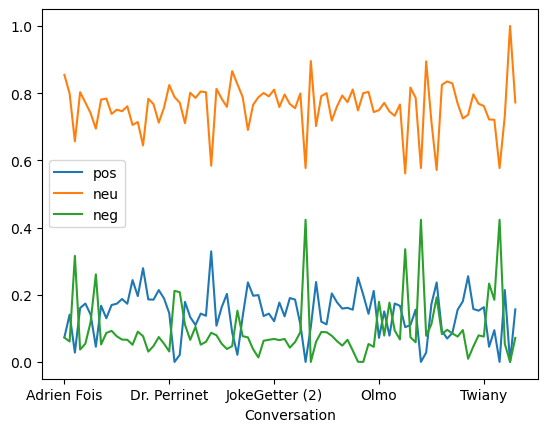

In [40]:
grouped_sentiment.plot()

In [15]:
df_english.Message[504]

' But I don’t know if they’re for free'

In [42]:
vs = analyzer.polarity_scores('I will come!	')
print("{:-<65} {}".format('I will come!	', str(vs)))

I will come!	---------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [21]:
vs['compound']

0.0

In [30]:
[vs[key] for key in ['neg', 'neu', 'pos']]

[0.0, 1.0, 0.0]

# Using Tabularisai

### No resampling of datetime data (so each message will be classified independently)

In [285]:
import pandas as pd
import os
import time

In [286]:
df = pd.read_hdf(os.path.join(os.getcwd(),"vis","demo.h5"))
subset = df[df.Conversation =='Angelita'].copy()

In [287]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [288]:
model_name = r"C:\git_repos\test_dir\multilingual-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [289]:
import time
import pandas as pd  # Make sure you've imported pandas

batch_size = 23  # Choose an appropriate batch size
num_batches = len(subset) // batch_size + (1 if len(subset) % batch_size != 0 else 0)
subset['sentiment'] = subset.Message

for i in range(num_batches):
    start_index = i * batch_size
    end_index = start_index + batch_size
    batch_texts = subset['Message'][start_index:end_index].tolist()
    subset.iloc[start_index:end_index, subset.columns.get_loc('sentiment')] = predict_sentiment(batch_texts)
    time.sleep(.01)
    print(i, end='\r')

1212

In [290]:
sentiments = pd.get_dummies(subset, columns=['sentiment'])[cols_oi]

In [291]:
cols_oi = ['Message','sentiment_Negative', 'sentiment_Neutral', 'sentiment_Positive',
       'sentiment_Very Negative', 'sentiment_Very Positive']

In [296]:
sentiments.loc[:, sentiments.columns != 'Message'].sum()/len(sentiments)
backup1 = subset.copy()

### Date resampled at each hour, so messages will be aggregated per hour and passed through the classifier as a bag of words

In [293]:
subset_h = subset.copy()
subset_h.Datetime = subset_h.Datetime.dt.floor('h')

In [294]:
group = subset_h.groupby(by='Datetime')

In [295]:
subset_h.columns

Index(['Datetime', 'Author', 'Message', 'Conversation', 'ENGLISH', 'SPANISH',
       'sentiment'],
      dtype='object')

In [302]:
subset_h = group.agg({
    'Message':lambda x:'. '.join(x)})

In [ ]:
import time
import pandas as pd  # Make sure you've imported pandas

batch_size = 26  # Choose an appropriate batch size
num_batches = len(subset_h) // batch_size + (1 if len(subset_h) % batch_size != 0 else 0)
subset_h['sentiment'] = subset_h.Message

for i in range(num_batches):
    start_index = i * batch_size
    end_index = start_index + batch_size
    batch_texts = subset_h['Message'][start_index:end_index].tolist()
    subset_h.iloc[start_index:end_index, subset_h.columns.get_loc('sentiment')] = predict_sentiment(batch_texts)
    time.sleep(.01)
    print(i, end='\r')

4

In [298]:
# subset_h = test.copy()
subset_h = pd.get_dummies(subset_h, columns=['sentiment'])[cols_oi]
cols_oi = ['Message','sentiment_Negative', 'sentiment_Neutral', 'sentiment_Positive',
       'sentiment_Very Negative', 'sentiment_Very Positive']
# Let's choose a better temporary variable name

subset_h

,Message,sentiment_Negative,sentiment_Neutral,sentiment_Positive,sentiment_Very Negative,sentiment_Very Positive
214777,Miles! Im Ángela,False,False,False,False,True
214778,Do you want to go to kuckuck,False,False,False,True,False
214779,Holaaaa :),False,True,False,False,False
214780,"Siii, estoy acqui con algunas personnes si qu...",False,False,True,False,False
214781,Siii vamos al kuckucks ahora,False,False,True,False,False
...,...,...,...,...,...,...
242671,Depende de los presentaciones,False,False,False,False,False
242672,Te aviso,False,False,False,False,False
242673,Intentaré estar antes de las 12,False,False,False,False,False
242674,<Multimedia omitido>,False,False,False,False,False


In [300]:
backup2 = subset_h.copy()
subset_h.loc[:, subset_h.columns != 'Message'].sum()/len(subset_h)


sentiment_Negative         0.001255
sentiment_Neutral          0.010968
sentiment_Positive         0.005305
sentiment_Very Negative    0.012008
sentiment_Very Positive    0.007742
dtype: float64

In [301]:
subset_h

,Message,sentiment_Negative,sentiment_Neutral,sentiment_Positive,sentiment_Very Negative,sentiment_Very Positive
214777,Miles! Im Ángela,False,False,False,False,True
214778,Do you want to go to kuckuck,False,False,False,True,False
214779,Holaaaa :),False,True,False,False,False
214780,"Siii, estoy acqui con algunas personnes si qu...",False,False,True,False,False
214781,Siii vamos al kuckucks ahora,False,False,True,False,False
...,...,...,...,...,...,...
242671,Depende de los presentaciones,False,False,False,False,False
242672,Te aviso,False,False,False,False,False
242673,Intentaré estar antes de las 12,False,False,False,False,False
242674,<Multimedia omitido>,False,False,False,False,False
